# Analyzing Categorical Data 

In this project, we'll be working with categorical data and will be using a subset of data from the following data set: (https://www.kaggle.com/datasets/norc/general-social-survey?select=gss.csv).

After cleaning the data, we will use some visualizations tools. We also had used statsmodels for a special type of categorical plot.

Lastly, we will predict the labor_status column using random forest classifier.

In [146]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Read in csv as a DataFrame and preview it
df = pd.read_csv("/Users/antoniogondim/Downloads/CSVfiles/archive/gss_sub.csv")
df

,year,id,labor_status,self_employed,marital_status,n_siblings,age,high_school,degree,political_affiliation,environment,law_enforcement,drugs,space_exploration,inequality,household_size
0,1972.0,1.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,3.0,23.0,16.0,BACHELOR,"IND,NEAR DEM",IAP,IAP,IAP,IAP,NaN,1.0
1,1972.0,2.0,RETIRED,SOMEONE ELSE,MARRIED,4.0,70.0,10.0,LT HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
2,1972.0,3.0,WORKING PARTTIME,SOMEONE ELSE,MARRIED,5.0,48.0,12.0,HIGH SCHOOL,INDEPENDENT,IAP,IAP,IAP,IAP,NaN,4.0
3,1972.0,4.0,WORKING FULLTIME,SOMEONE ELSE,MARRIED,5.0,27.0,17.0,BACHELOR,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
4,1972.0,5.0,KEEPING HOUSE,SOMEONE ELSE,MARRIED,2.0,61.0,12.0,HIGH SCHOOL,STRONG DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,2014.0,2539.0,KEEPING HOUSE,SOMEONE ELSE,WIDOWED,6.0,89.0,14.0,JUNIOR COLLEGE,NOT STR REPUBLICAN,TOO LITTLE,TOO LITTLE,TOO LITTLE,IAP,NaN,1.0
59595,2014.0,2540.0,WORKING FULLTIME,SOMEONE ELSE,DIVORCED,3.0,56.0,12.0,HIGH SCHOOL,INDEPENDENT,TOO LITTLE,TOO LITTLE,TOO MUCH,IAP,NaN,1.0
59596,2014.0,2541.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,5.0,24.0,14.0,HIGH SCHOOL,"IND,NEAR DEM",TOO LITTLE,ABOUT RIGHT,ABOUT RIGHT,IAP,NaN,3.0
59597,2014.0,2542.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,2.0,27.0,13.0,HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   59599 non-null  float64
 1   id                     59599 non-null  float64
 2   labor_status           59583 non-null  object 
 3   self_employed          59306 non-null  object 
 4   marital_status         59575 non-null  object 
 5   n_siblings             56682 non-null  float64
 6   age                    59599 non-null  float64
 7   high_school            59440 non-null  float64
 8   degree                 59464 non-null  object 
 9   political_affiliation  59257 non-null  object 
 10  environment            59388 non-null  object 
 11  law_enforcement        59378 non-null  object 
 12  drugs                  59380 non-null  object 
 13  space_exploration      59596 non-null  object 
 14  inequality             1532 non-null   float64
 15  ho

In [148]:

df=df.drop('inequality', axis=1)
#Too many null values at this column
df.isnull().sum()
    

year                        0
id                          0
labor_status               16
self_employed             293
marital_status             24
n_siblings               2917
age                         0
high_school               159
degree                    135
political_affiliation     342
environment               211
law_enforcement           221
drugs                     219
space_exploration           3
household_size              0
dtype: int64

In [149]:
df['n_siblings'].value_counts()

 2.0     10717
 1.0      9602
 3.0      9109
 4.0      6705
 5.0      4860
 6.0      3688
 7.0      3168
 8.0      2075
 9.0      1536
-1.0      1518
 10.0     1066
 11.0      826
 12.0      550
 13.0      370
 14.0      213
 15.0      144
 99.0      111
 16.0      105
 98.0       57
 17.0       48
 21.0       46
 18.0       41
 20.0       29
 19.0       25
 22.0       15
 23.0       14
 25.0        6
 27.0        6
 26.0        6
 31.0        6
 24.0        5
 30.0        4
 33.0        2
 32.0        2
 29.0        2
 68.0        1
 35.0        1
 34.0        1
 37.0        1
 55.0        1
Name: n_siblings, dtype: int64

In [150]:
df.n_siblings.replace(np.nan,int(2.0), inplace=True)

In [151]:
df.shape

(59599, 15)

In [152]:
df=df.dropna()
df.shape

(58439, 15)

Above we see that our DataFrame contains `float64` column (numerical data), as well as a number of `object` columns, i.e object data types contain strings.

df.describe() method with the `include` parameter to select a particular DataType (in this case `"O"`). This returns the count, number of unique values, the mode, and frequency of the mode for each column having object as data type.

In [153]:
df.describe(include="O")

,labor_status,self_employed,marital_status,degree,political_affiliation,environment,law_enforcement,drugs,space_exploration
count,58439,58439,58439,58439,58439,58439,58439,58439,58439
unique,8,4,5,6,9,5,5,5,5
top,WORKING FULLTIME,SOMEONE ELSE,MARRIED,HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP
freq,28960,48809,31376,30124,12272,37576,37576,37576,57963


In [154]:
df["environment"].value_counts()

IAP            37576
TOO LITTLE     12971
ABOUT RIGHT     5351
TOO MUCH        1660
DK               881
Name: environment, dtype: int64

## Manipulating categorical data

- The categorical variable type can be useful, especially here:
    - It is possible to specify a precise order to the categories when the default order may be incorrect (e.g., via alphabetical).
    - Can be compatible with other Python libraries.

Let's take our existing categorical variables and convert them from strings to categories. Here, we use [`.select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to return only object columns, and with a dictionary set their type to be a category.

In [155]:
# Create a dictionary of column and data type mappings
conversion_dict = {k: "category" for k in df.select_dtypes(include="object").columns}

# Convert our DataFrame and check the data types
df = df.astype(conversion_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58439 entries, 0 to 59598
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   58439 non-null  float64 
 1   id                     58439 non-null  float64 
 2   labor_status           58439 non-null  category
 3   self_employed          58439 non-null  category
 4   marital_status         58439 non-null  category
 5   n_siblings             58439 non-null  float64 
 6   age                    58439 non-null  float64 
 7   high_school            58439 non-null  float64 
 8   degree                 58439 non-null  category
 9   political_affiliation  58439 non-null  category
 10  environment            58439 non-null  category
 11  law_enforcement        58439 non-null  category
 12  drugs                  58439 non-null  category
 13  space_exploration      58439 non-null  category
 14  household_size         58439 non-null 

Already we can see that the memory usage of the DataFrame has been halved from 7 mb to about 4 mb, optmizing the data.

### Cleaning up the `labor_status` column
To analyze the relationship between employment and attitudes over time, we need to clean up the `labor_status` column. We can preview the existing categories using `.categories`.

In [156]:
df["labor_status"].values

['WORKING FULLTIME', 'RETIRED', 'WORKING PARTTIME', 'WORKING FULLTIME', 'KEEPING HOUSE', ..., 'KEEPING HOUSE', 'WORKING FULLTIME', 'WORKING FULLTIME', 'WORKING FULLTIME', 'WORKING PARTTIME']
Length: 58439
Categories (8, object): ['KEEPING HOUSE', 'OTHER', 'RETIRED', 'SCHOOL', 'TEMP NOT WORKING', 'UNEMPL, LAID OFF', 'WORKING FULLTIME', 'WORKING PARTTIME']

In [157]:
df["labor_status"].value_counts()

WORKING FULLTIME    28960
KEEPING HOUSE        9478
RETIRED              7861
WORKING PARTTIME     6012
UNEMPL, LAID OFF     1920
SCHOOL               1807
TEMP NOT WORKING     1240
OTHER                1161
Name: labor_status, dtype: int64

Let's collapse some of these categories. The easiest way to do this is to replace the values inside the column using a dictionary, and then reset the data type back to a category.

In [158]:
# Create a dictionary of categories to adress the new values for each old one
new_labor_status = {"UNEMPL, LAID OFF": "UNEMPLOYED", 
                    "TEMP NOT WORKING": "UNEMPLOYED",
                    "WORKING FULLTIME": "EMPLOYED",
                    "WORKING PARTTIME": "EMPLOYED"
                   }

# Replace the values in the column and reset the dtype as a category
df["labor_status_clean"] = df["labor_status"].replace(new_labor_status).astype("category")
print(df.dtypes)
# Preview the new column
df["labor_status_clean"].value_counts()

year                      float64
id                        float64
labor_status             category
self_employed            category
marital_status           category
n_siblings                float64
age                       float64
high_school               float64
degree                   category
political_affiliation    category
environment              category
law_enforcement          category
drugs                    category
space_exploration        category
household_size            float64
labor_status_clean       category
dtype: object


EMPLOYED         34972
KEEPING HOUSE     9478
RETIRED           7861
UNEMPLOYED        3160
SCHOOL            1807
OTHER             1161
Name: labor_status_clean, dtype: int64

### Reordering categories


In [159]:
df["environment"].values

['IAP', 'IAP', 'IAP', 'IAP', 'IAP', ..., 'TOO LITTLE', 'TOO LITTLE', 'TOO LITTLE', 'IAP', 'IAP']
Length: 58439
Categories (5, object): ['ABOUT RIGHT', 'DK', 'IAP', 'TOO LITTLE', 'TOO MUCH']

In [160]:
# Set the new order
new_order = ["TOO LITTLE", "ABOUT RIGHT", "TOO MUCH", "DK", "IAP"]
categories_to_remove = ["DK", "IAP"]

# Loop through each column
for col in ["environment", "law_enforcement", "drugs"]:
    # Reorder and remove the categories
    df[col + "_clean"] = df[col].cat.reorder_categories(new_order, ordered=True)
    df[col + "_clean"] = df[col + "_clean"].cat.remove_categories(categories_to_remove)

# Preview one of the columns' categories
df["environment_clean"].cat.categories

Index(['TOO LITTLE', 'ABOUT RIGHT', 'TOO MUCH'], dtype='object')

Now let's also apply these steps to education level in one go: collapsing, removing, and reording.

In [161]:
df['degree'].values #let's reorder that and remove 'DK'

['BACHELOR', 'LT HIGH SCHOOL', 'HIGH SCHOOL', 'BACHELOR', 'HIGH SCHOOL', ..., 'JUNIOR COLLEGE', 'HIGH SCHOOL', 'HIGH SCHOOL', 'HIGH SCHOOL', 'HIGH SCHOOL']
Length: 58439
Categories (6, object): ['BACHELOR', 'DK', 'GRADUATE', 'HIGH SCHOOL', 'JUNIOR COLLEGE', 'LT HIGH SCHOOL']

In [162]:
# Define a dictionary to map old degree categories to new ones
new_degree = {"LT HIGH SCHOOL": "HIGH SCHOOL", 
              "BACHELOR": "COLLEGE/UNIVERSITY",
              "GRADUATE": "COLLEGE/UNIVERSITY",
              "JUNIOR COLLEGE": "COLLEGE/UNIVERSITY"}

# Replace old degree categories with new ones and convert to categorical data type
df["degree_clean"] = df["degree"].replace(new_degree).astype("category")

# Remove "DK" category from degree_clean column
df["degree_clean"] = df["degree_clean"].cat.remove_categories(["DK"])

# Reorder degree_clean categories and set as ordered
df["degree_clean"] = df["degree_clean"].cat.reorder_categories(["HIGH SCHOOL", "COLLEGE/UNIVERSITY"], ordered=True)

# Preview the new column
df["degree_clean"].value_counts()

HIGH SCHOOL           42756
COLLEGE/UNIVERSITY    15660
Name: degree_clean, dtype: int64


By [`IntervalIndex`](https://pandas.pydata.org/docs/reference/api/pandas.IntervalIndex.html) we set cutoff ranges for the `year`. We then use [`pd.cut()`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to cut our `year` column by these ranges, and set labels for each range.

In [163]:
# Set the bins and cut the DataFrame
decade_boundaries = [(1970, 1979),(1979,1989) , (1989, 1999), (1999, 2009), (2009, 2019)]

bins = pd.IntervalIndex.from_tuples(decade_boundaries)#this method returns an array, which has entries being the respective intervals created by each tuple

decade_labels = {bins[0]:'1970s',
                 bins[1]: '1980s',
                 bins[2]:'1990s',
                 bins[3]:'2000s',
                bins[4]:'2010s'}


print(bins)
df["decade"] = pd.cut(df["year"], bins)#creates a new column based on the year column, whose entries will be the bins,i.e, the decades established by the intervals
print(df['decade'].values, df['decade'].dtypes)

# Rename each of the intervals of decade_boundaries as the decades on decade_labels
df['decade']=df["decade"].replace(decade_labels)#.astype('category')

# Preview the new column
df#notice on df the 1st column, whoch is the year, and the last one, which is the decade

IntervalIndex([(1970, 1979], (1979, 1989], (1989, 1999], (1999, 2009], (2009, 2019]], dtype='interval[int64, right]')
[(1970, 1979], (1970, 1979], (1970, 1979], (1970, 1979], (1970, 1979], ..., (2009, 2019], (2009, 2019], (2009, 2019], (2009, 2019], (2009, 2019]]
Length: 58439
Categories (5, interval[int64, right]): [(1970, 1979] < (1979, 1989] < (1989, 1999] < (1999, 2009] < (2009, 2019]] category


,year,id,labor_status,self_employed,marital_status,n_siblings,age,high_school,degree,political_affiliation,...,law_enforcement,drugs,space_exploration,household_size,labor_status_clean,environment_clean,law_enforcement_clean,drugs_clean,degree_clean,decade
0,1972.0,1.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,3.0,23.0,16.0,BACHELOR,"IND,NEAR DEM",...,IAP,IAP,IAP,1.0,EMPLOYED,NaN,NaN,NaN,COLLEGE/UNIVERSITY,1970s
1,1972.0,2.0,RETIRED,SOMEONE ELSE,MARRIED,4.0,70.0,10.0,LT HIGH SCHOOL,NOT STR DEMOCRAT,...,IAP,IAP,IAP,2.0,RETIRED,NaN,NaN,NaN,HIGH SCHOOL,1970s
2,1972.0,3.0,WORKING PARTTIME,SOMEONE ELSE,MARRIED,5.0,48.0,12.0,HIGH SCHOOL,INDEPENDENT,...,IAP,IAP,IAP,4.0,EMPLOYED,NaN,NaN,NaN,HIGH SCHOOL,1970s
3,1972.0,4.0,WORKING FULLTIME,SOMEONE ELSE,MARRIED,5.0,27.0,17.0,BACHELOR,NOT STR DEMOCRAT,...,IAP,IAP,IAP,2.0,EMPLOYED,NaN,NaN,NaN,COLLEGE/UNIVERSITY,1970s
4,1972.0,5.0,KEEPING HOUSE,SOMEONE ELSE,MARRIED,2.0,61.0,12.0,HIGH SCHOOL,STRONG DEMOCRAT,...,IAP,IAP,IAP,2.0,KEEPING HOUSE,NaN,NaN,NaN,HIGH SCHOOL,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,2014.0,2539.0,KEEPING HOUSE,SOMEONE ELSE,WIDOWED,6.0,89.0,14.0,JUNIOR COLLEGE,NOT STR REPUBLICAN,...,TOO LITTLE,TOO LITTLE,IAP,1.0,KEEPING HOUSE,TOO LITTLE,TOO LITTLE,TOO LITTLE,COLLEGE/UNIVERSITY,2010s
59595,2014.0,2540.0,WORKING FULLTIME,SOMEONE ELSE,DIVORCED,3.0,56.0,12.0,HIGH SCHOOL,INDEPENDENT,...,TOO LITTLE,TOO MUCH,IAP,1.0,EMPLOYED,TOO LITTLE,TOO LITTLE,TOO MUCH,HIGH SCHOOL,2010s
59596,2014.0,2541.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,5.0,24.0,14.0,HIGH SCHOOL,"IND,NEAR DEM",...,ABOUT RIGHT,ABOUT RIGHT,IAP,3.0,EMPLOYED,TOO LITTLE,ABOUT RIGHT,ABOUT RIGHT,HIGH SCHOOL,2010s
59597,2014.0,2542.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,2.0,27.0,13.0,HIGH SCHOOL,NOT STR DEMOCRAT,...,IAP,IAP,IAP,2.0,EMPLOYED,NaN,NaN,NaN,HIGH SCHOOL,2010s


## Visualization

In [164]:
# Create a new figure object
fig = px.bar(df["labor_status"].value_counts(),
             template="plotly_white"
            )

# Hide the legend and show the plot
fig.update_layout(showlegend=False)
fig.show()

Let's change the orientation of the plot and add a title, for a better perspective.

In [165]:
# Create a new figure object
fig = px.bar(df["labor_status"].value_counts(ascending=True),
             template="plotly_white",
             orientation="h",
             title="Labor status by count"
            )

# Hide the legend and show the plot
fig.update_layout(showlegend=False)
fig.show()

### Bar charts 

In [166]:
## Aggregate household size by year
household_by_decade = df.groupby("decade",as_index=False)["household_size"].mean()
household_by_decade

,decade,household_size
0,1970s,3.238023
1,1980s,2.741394
2,1990s,2.546036
3,2000s,2.464682
4,2010s,2.411328


In [167]:
# Create a new figure object
fig = px.bar(household_by_decade,
             x="decade",
             y="household_size",
             template="plotly_white",
             title="Average household size by decade"
            )

fig.show()

### Boxplots


In [168]:
# Create a new figure object
fig = px.box(df,
             x="age",
             y="labor_status_clean",
             template="plotly_white"
            )

fig.show()

### Mosaic plots
visualize the relationship between two categorical variables. One way to do this is a frequency table, which will give the counts across the different combinations of the two variables.
create a frequency table using [`pd.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [169]:
pd.crosstab(df["degree_clean"], df["law_enforcement_clean"])

law_enforcement_clean,TOO LITTLE,ABOUT RIGHT,TOO MUCH
degree_clean,,,
HIGH SCHOOL,7937,4799,1309
COLLEGE/UNIVERSITY,3193,2598,422


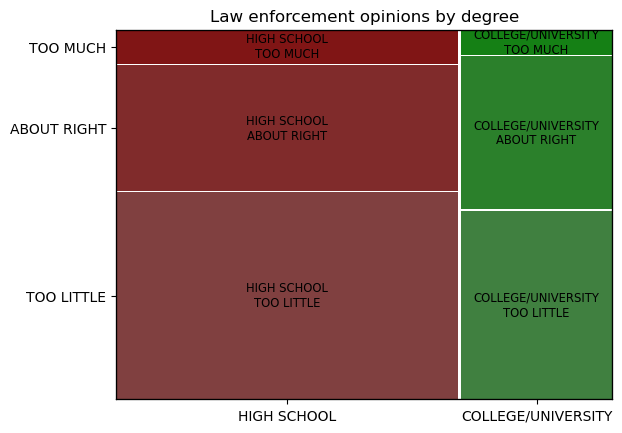

In [170]:
# Create a mosaic plot and show it
mosaic(df, 
       ['degree_clean', 'law_enforcement_clean'], 
       title='Law enforcement opinions by degree')

plt.show()

### Line charts
The final plot type we will cover is a line plot. Line plots often (but not always!) show the relationship between time and a numerical variable. Adding in a categorical variable can be a great way to enrich a line plot and provide other information.

Here, we use the `.value_counts()` method as an aggregation function, and use this in combination with a Plotly [`line_plot()`](https://plotly.com/python/line-charts/) to visualize the trend in marital statuses over the years.

In [171]:
# Group the dataframe by year and marital status, and calculate the normalized value counts
marital_rates = df.groupby(["year"], as_index=False)["marital_status"].value_counts(normalize=True)

# Display the resulting DataFrame
marital_rates

,year,marital_status,proportion
0,1972.0,MARRIED,0.723391
1,1972.0,NEVER MARRIED,0.128744
2,1972.0,WIDOWED,0.084130
3,1972.0,DIVORCED,0.039516
4,1972.0,SEPARATED,0.024219
...,...,...,...
145,2014.0,MARRIED,0.458918
146,2014.0,NEVER MARRIED,0.265331
147,2014.0,DIVORCED,0.163126
148,2014.0,WIDOWED,0.081363


In [172]:
# Create a new figure object
fig = px.line(marital_rates,
              x="year",
              y="proportion",
              color="marital_status",
              template="plotly_white",
              title="Marital status over time"
             )

# Update the y-axis to show percentages
fig.update_yaxes(tickformat=".0%")

# Show the plot
fig.show()

In [173]:
df.isna().sum()

year                         0
id                           0
labor_status                 0
self_employed                0
marital_status               0
n_siblings                   0
age                          0
high_school                  0
degree                       0
political_affiliation        0
environment                  0
law_enforcement              0
drugs                        0
space_exploration            0
household_size               0
labor_status_clean           0
environment_clean        38457
law_enforcement_clean    38176
drugs_clean              38928
degree_clean                23
decade                       0
dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58439 entries, 0 to 59598
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   58439 non-null  float64 
 1   id                     58439 non-null  float64 
 2   labor_status           58439 non-null  category
 3   self_employed          58439 non-null  category
 4   marital_status         58439 non-null  category
 5   n_siblings             58439 non-null  float64 
 6   age                    58439 non-null  float64 
 7   high_school            58439 non-null  float64 
 8   degree                 58439 non-null  category
 9   political_affiliation  58439 non-null  category
 10  environment            58439 non-null  category
 11  law_enforcement        58439 non-null  category
 12  drugs                  58439 non-null  category
 13  space_exploration      58439 non-null  category
 14  household_size         58439 non-null 

In [175]:
df.labor_status.value_counts()

WORKING FULLTIME    28960
KEEPING HOUSE        9478
RETIRED              7861
WORKING PARTTIME     6012
UNEMPL, LAID OFF     1920
SCHOOL               1807
TEMP NOT WORKING     1240
OTHER                1161
Name: labor_status, dtype: int64

In [176]:
df['self_employed'].dtypes

CategoricalDtype(categories=['DK', 'IAP', 'SELF-EMPLOYED', 'SOMEONE ELSE'], ordered=False)

In [177]:
df.isnull().sum()

year                         0
id                           0
labor_status                 0
self_employed                0
marital_status               0
n_siblings                   0
age                          0
high_school                  0
degree                       0
political_affiliation        0
environment                  0
law_enforcement              0
drugs                        0
space_exploration            0
household_size               0
labor_status_clean           0
environment_clean        38457
law_enforcement_clean    38176
drugs_clean              38928
degree_clean                23
decade                       0
dtype: int64

In [178]:
v=['environment_clean','law_enforcement_clean','drugs_clean','degree','labor_status','decade']
df.drop(columns=v,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58439 entries, 0 to 59598
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   58439 non-null  float64 
 1   id                     58439 non-null  float64 
 2   self_employed          58439 non-null  category
 3   marital_status         58439 non-null  category
 4   n_siblings             58439 non-null  float64 
 5   age                    58439 non-null  float64 
 6   high_school            58439 non-null  float64 
 7   political_affiliation  58439 non-null  category
 8   environment            58439 non-null  category
 9   law_enforcement        58439 non-null  category
 10  drugs                  58439 non-null  category
 11  space_exploration      58439 non-null  category
 12  household_size         58439 non-null  float64 
 13  labor_status_clean     58439 non-null  category
 14  degree_clean           58416 non-null 

In [179]:
df.labor_status_clean.value_counts()

EMPLOYED         34972
KEEPING HOUSE     9478
RETIRED           7861
UNEMPLOYED        3160
SCHOOL            1807
OTHER             1161
Name: labor_status_clean, dtype: int64

In [180]:
df.self_employed=df.self_employed.astype('category').cat.remove_categories('DK')

In [181]:
df.self_employed.value_counts()

SOMEONE ELSE     48809
SELF-EMPLOYED     6391
IAP               3227
Name: self_employed, dtype: int64

In [182]:
df.dropna(inplace=True)
df.shape

(58404, 15)

In [183]:
df.labor_status_clean.value_counts()

EMPLOYED         34964
KEEPING HOUSE     9469
RETIRED           7850
UNEMPLOYED        3156
SCHOOL            1806
OTHER             1159
Name: labor_status_clean, dtype: int64

## EDA


In [184]:
df.labor_status_clean.replace(['KEEPING HOUSE','OTHER'],['UNEMPLOYED','UNEMPLOYED'],inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58404 entries, 0 to 59598
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   58404 non-null  float64 
 1   id                     58404 non-null  float64 
 2   self_employed          58404 non-null  category
 3   marital_status         58404 non-null  category
 4   n_siblings             58404 non-null  float64 
 5   age                    58404 non-null  float64 
 6   high_school            58404 non-null  float64 
 7   political_affiliation  58404 non-null  category
 8   environment            58404 non-null  category
 9   law_enforcement        58404 non-null  category
 10  drugs                  58404 non-null  category
 11  space_exploration      58404 non-null  category
 12  household_size         58404 non-null  float64 
 13  labor_status_clean     58404 non-null  category
 14  degree_clean           58404 non-null 

In [186]:
for x in df.columns:
    if (df[x].dtypes=='category') and (x != 'labor_status_clean'):
        dummies=pd.get_dummies(df[x],prefix=x)
        df = pd.concat([df, dummies], axis=1)


In [187]:
df

,year,id,self_employed,marital_status,n_siblings,age,high_school,political_affiliation,environment,law_enforcement,...,drugs_IAP,drugs_TOO LITTLE,drugs_TOO MUCH,space_exploration_ABOUT RIGHT,space_exploration_DK,space_exploration_IAP,space_exploration_TOO LITTLE,space_exploration_TOO MUCH,degree_clean_HIGH SCHOOL,degree_clean_COLLEGE/UNIVERSITY
0,1972.0,1.0,SOMEONE ELSE,NEVER MARRIED,3.0,23.0,16.0,"IND,NEAR DEM",IAP,IAP,...,1,0,0,0,0,1,0,0,0,1
1,1972.0,2.0,SOMEONE ELSE,MARRIED,4.0,70.0,10.0,NOT STR DEMOCRAT,IAP,IAP,...,1,0,0,0,0,1,0,0,1,0
2,1972.0,3.0,SOMEONE ELSE,MARRIED,5.0,48.0,12.0,INDEPENDENT,IAP,IAP,...,1,0,0,0,0,1,0,0,1,0
3,1972.0,4.0,SOMEONE ELSE,MARRIED,5.0,27.0,17.0,NOT STR DEMOCRAT,IAP,IAP,...,1,0,0,0,0,1,0,0,0,1
4,1972.0,5.0,SOMEONE ELSE,MARRIED,2.0,61.0,12.0,STRONG DEMOCRAT,IAP,IAP,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,2014.0,2539.0,SOMEONE ELSE,WIDOWED,6.0,89.0,14.0,NOT STR REPUBLICAN,TOO LITTLE,TOO LITTLE,...,0,1,0,0,0,1,0,0,0,1
59595,2014.0,2540.0,SOMEONE ELSE,DIVORCED,3.0,56.0,12.0,INDEPENDENT,TOO LITTLE,TOO LITTLE,...,0,0,1,0,0,1,0,0,1,0
59596,2014.0,2541.0,SOMEONE ELSE,NEVER MARRIED,5.0,24.0,14.0,"IND,NEAR DEM",TOO LITTLE,ABOUT RIGHT,...,0,0,0,0,0,1,0,0,1,0
59597,2014.0,2542.0,SOMEONE ELSE,NEVER MARRIED,2.0,27.0,13.0,NOT STR DEMOCRAT,IAP,IAP,...,1,0,0,0,0,1,0,0,1,0


In [188]:
# Identify the 'DK'-DON'T KNOW- columns and dropping them 
duplicate_columns = []
for x in df.columns:
    if 'DK' in x.split('_'):
        df.drop(columns=[x],inplace=True)

df.columns

#Now we should drop the old dtype category columns-and keep the float dtype columns-.
#don't forget to drop id column and then use standard scaler
#before using SVM, random forest and after using standard scaler, it might be good to use some feature selection: i.e, L1 regressor or PCA or even Random forest feature selection
#Another thing: I think I should keep labor_status_column as a single column so that we can predict it, thus we shall not use get_dummies for this one, but just use some integers and then scale it

Index(['year', 'id', 'self_employed', 'marital_status', 'n_siblings', 'age',
       'high_school', 'political_affiliation', 'environment',
       'law_enforcement', 'drugs', 'space_exploration', 'household_size',
       'labor_status_clean', 'degree_clean', 'self_employed_IAP',
       'self_employed_SELF-EMPLOYED', 'self_employed_SOMEONE ELSE',
       'marital_status_DIVORCED', 'marital_status_MARRIED',
       'marital_status_NEVER MARRIED', 'marital_status_SEPARATED',
       'marital_status_WIDOWED', 'political_affiliation_IND,NEAR DEM',
       'political_affiliation_IND,NEAR REP',
       'political_affiliation_INDEPENDENT',
       'political_affiliation_NOT STR DEMOCRAT',
       'political_affiliation_NOT STR REPUBLICAN',
       'political_affiliation_OTHER PARTY',
       'political_affiliation_STRONG DEMOCRAT',
       'political_affiliation_STRONG REPUBLICAN', 'environment_ABOUT RIGHT',
       'environment_IAP', 'environment_TOO LITTLE', 'environment_TOO MUCH',
       'law_enforceme

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58404 entries, 0 to 59598
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   year                                      58404 non-null  float64 
 1   id                                        58404 non-null  float64 
 2   self_employed                             58404 non-null  category
 3   marital_status                            58404 non-null  category
 4   n_siblings                                58404 non-null  float64 
 5   age                                       58404 non-null  float64 
 6   high_school                               58404 non-null  float64 
 7   political_affiliation                     58404 non-null  category
 8   environment                               58404 non-null  category
 9   law_enforcement                           58404 non-null  category
 10  drugs                 

In [190]:
df.labor_status_clean.value_counts()

EMPLOYED      34964
UNEMPLOYED    13784
RETIRED        7850
SCHOOL         1806
Name: labor_status_clean, dtype: int64

In [191]:
dict={'EMPLOYED':0,
    'UNEMPLOYED':1,
    'RETIRED':2,
     'SCHOOL':3}

In [192]:
df.labor_status_clean.replace(dict,inplace=True)

In [193]:
X=df.drop(columns=['year', 'id', 'self_employed', 'marital_status', 'political_affiliation', 'environment',
       'law_enforcement', 'drugs', 'space_exploration',
       'labor_status_clean', 'degree_clean'])
y=df.labor_status_clean

In [194]:
X

,n_siblings,age,high_school,household_size,self_employed_IAP,self_employed_SELF-EMPLOYED,self_employed_SOMEONE ELSE,marital_status_DIVORCED,marital_status_MARRIED,marital_status_NEVER MARRIED,...,drugs_ABOUT RIGHT,drugs_IAP,drugs_TOO LITTLE,drugs_TOO MUCH,space_exploration_ABOUT RIGHT,space_exploration_IAP,space_exploration_TOO LITTLE,space_exploration_TOO MUCH,degree_clean_HIGH SCHOOL,degree_clean_COLLEGE/UNIVERSITY
0,3.0,23.0,16.0,1.0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,4.0,70.0,10.0,2.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,5.0,48.0,12.0,4.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,5.0,27.0,17.0,2.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,2.0,61.0,12.0,2.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,6.0,89.0,14.0,1.0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
59595,3.0,56.0,12.0,1.0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
59596,5.0,24.0,14.0,3.0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
59597,2.0,27.0,13.0,2.0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [195]:
y

0        0
1        2
2        0
3        0
4        1
        ..
59594    1
59595    0
59596    0
59597    0
59598    0
Name: labor_status_clean, Length: 58404, dtype: category
Categories (4, int64): [2, 3, 1, 0]

## DATA PREPROCESSING

In [196]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [197]:
X

,n_siblings,age,high_school,household_size,self_employed_IAP,self_employed_SELF-EMPLOYED,self_employed_SOMEONE ELSE,marital_status_DIVORCED,marital_status_MARRIED,marital_status_NEVER MARRIED,...,drugs_ABOUT RIGHT,drugs_IAP,drugs_TOO LITTLE,drugs_TOO MUCH,space_exploration_ABOUT RIGHT,space_exploration_IAP,space_exploration_TOO LITTLE,space_exploration_TOO MUCH,degree_clean_HIGH SCHOOL,degree_clean_COLLEGE/UNIVERSITY
0,3.0,23.0,16.0,1.0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,4.0,70.0,10.0,2.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,5.0,48.0,12.0,4.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,5.0,27.0,17.0,2.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,2.0,61.0,12.0,2.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,6.0,89.0,14.0,1.0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
59595,3.0,56.0,12.0,1.0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
59596,5.0,24.0,14.0,3.0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
59597,2.0,27.0,13.0,2.0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58404 entries, 0 to 59598
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   n_siblings                                58404 non-null  float64
 1   age                                       58404 non-null  float64
 2   high_school                               58404 non-null  float64
 3   household_size                            58404 non-null  float64
 4   self_employed_IAP                         58404 non-null  uint8  
 5   self_employed_SELF-EMPLOYED               58404 non-null  uint8  
 6   self_employed_SOMEONE ELSE                58404 non-null  uint8  
 7   marital_status_DIVORCED                   58404 non-null  uint8  
 8   marital_status_MARRIED                    58404 non-null  uint8  
 9   marital_status_NEVER MARRIED              58404 non-null  uint8  
 10  marital_status_SEPARATED          

## Feature Selection

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [200]:
X_train.shape

(43803, 38)

In [201]:
X_test.shape

(14601, 38)

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [203]:
importances = rf.feature_importances_

In [204]:
importances

array([1.42235491e-01, 3.80685509e-01, 1.10721026e-01, 7.03656145e-02,
       4.95828193e-02, 1.08326676e-02, 1.43801665e-02, 6.73995633e-03,
       9.78479099e-03, 1.13033867e-02, 4.02474671e-03, 1.94768368e-02,
       1.08727605e-02, 9.14664269e-03, 1.19807002e-02, 1.33464175e-02,
       1.23752828e-02, 3.43512109e-03, 1.20826463e-02, 9.58872912e-03,
       7.00586269e-03, 2.73222703e-03, 7.92573728e-03, 4.16123279e-03,
       7.76758242e-03, 2.79712248e-03, 8.22629200e-03, 4.06729726e-03,
       8.04099972e-03, 2.89807749e-03, 9.07410029e-03, 4.95846427e-03,
       8.67008336e-04, 1.46944564e-03, 1.80189682e-04, 8.96364582e-04,
       7.68431550e-03, 6.28636872e-03])

we can see there is only two columns with degree of importance of order e^{-4}, so we we'll disconsider those two columns

In [205]:
k = 36
top_features_indices = importances.argsort()[-k:][::-1]
selected_features = X_train.columns[top_features_indices]

## Training the data

In [206]:
X_train_selected = X_train[selected_features]
X_val_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate on validation set
predictions = rf_selected.predict(X_val_selected)
# Evaluate performance metrics (e.g., accuracy, precision, recall, etc.)
predictions

array([0, 0, 2, ..., 0, 1, 1])

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy*100,"%")


# Calculate precision
precision = precision_score(y_test, predictions,average=None)
print("Random forest precision:", precision)
  
    

# Calculate recall
recall = recall_score(y_test, predictions,average=None)
print("Random Forest recall:", recall)


# Calculate F1-score
f1 = f1_score(y_test, predictions,average=None)
print("Random Forest F1:", f1)


Random Forest Accuracy: 69.20758852133415 %
Random forest precision: [0.74975591 0.4802005  0.6172093  0.6588785 ]
Random Forest recall: [0.87509972 0.27905622 0.67911975 0.32118451]
Random Forest F1: [0.80759321 0.35298452 0.64668616 0.43185299]


In [208]:
#Now let's compute accuracy for SVM algorithm
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [209]:
#Apply PCA for dimensionality reduction, since we have too many features
pca = PCA(n_components=0.9)  # Retain components explaining 90% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Train an SVM classifier
svm = SVC()
svm.fit(X_train_pca, y_train)

#Predict on the test set
y_pred = svm.predict(X_test_pca)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.6831038969933566
